# **1 - Preparação dos dados**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.shape

(12283, 12)

In [ ]:
len(df.fullVisitorId.unique()) # quantidade de usuários únicos

9996

In [ ]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

A coluna date pode ter um problema já que não é um inteiro de fato, isso é os 4 primeiros algarismos representa o ano, os 2 seguintes o mês e os outros dois o dia.

In [ ]:
data = df.date.iloc[0]
data

20160902

In [ ]:
type(data)

numpy.int64

In [ ]:
data[0:4] #dá erro porque é um inteiro

IndexError: ignored

In [ ]:
data = str(df.date[0]) #transformando em um string, funciona!

data[0:4]

'2016'

A coluna fullVisitorID está como inteiro e isso pode gerar problemas, por exemplo com zeros à esquerda.

In [ ]:
numero = int("00123")
numero

123

## **Corrigindo os dados**

Alteramos direto na hora de ler o arquivo pois o pandas pode ler e interpretar e retirar o zero à esquerda por exemplo.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv',
                 dtype = {'date':object, 'fullVisitorId':object, 'VisitId':object})


In [ ]:
df.dtypes # agora os arquivos estão com o formato correto

channelGrouping              object
date                         object
fullVisitorId                object
sessionId                    object
socialEngagementType         object
visitId                       int64
visitNumber                   int64
visitStartTime                int64
browser                      object
browserVersion               object
browserSize                  object
operatingSystem              object
operatingSystemVersion       object
isMobile                       bool
mobileDeviceBranding         object
mobileDeviceModel            object
mobileInputSelector          object
mobileDeviceInfo             object
mobileDeviceMarketingName    object
flashVersion                 object
language                     object
screenColors                 object
screenResolution             object
deviceCategory               object
continent                    object
subContinent                 object
country                      object
region                      

##**Trabalho com dicionários**

In [ ]:
df.head()
    


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

No python é cohecido como dicionário, chave e valor que  também é conhecido como json.

Para passar para o modelo será melhor colocar esses valores em colunas.

In [ ]:
df.device.iloc[0]


'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [ ]:
type(df.device.iloc[0]) 


str

Está como uma string, mas primeiro precisamos converter em dict para trabalhar com o pandas. Para isso usamos a biblioteca json.

In [ ]:
import json

In [ ]:
json.loads(df.device.iloc[0])
# notamos que essa função separa em valores de um dicionário

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

In [ ]:
type(json.loads(df.device.iloc[0]))


dict

Por meio de um list comprehension aplicamos a função json.loads que transformou a coluna device em uma lista de dicionários e em seguida transformamos em um DataFrame.

In [ ]:
pd.DataFrame([json.loads(linha) for linha in df.device]) 


,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [ ]:
dicionario = ['device','geoNetwork', 'trafficSource','totals' ]

In [ ]:
for coluna in dicionario:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [ ]:
df.shape


(12283, 54)

In [ ]:
df.drop(dicionario, axis=1,inplace=True )


In [ ]:
df.shape

(12283, 50)

##**Limpando a base de dados**

In [ ]:
len(df.channelGrouping.unique())

8

In [ ]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'campaign', 'source',
       'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect', 'referralPath',
       'adContent', 'campaignCode', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'transactionRevenue'],
      dtype='object')

In [ ]:
for coluna in df.columns:
  print(f'{coluna}:  {len(df[coluna].unique())}')


channelGrouping:  8
date:  366
fullVisitorId:  9997
sessionId:  12276
socialEngagementType:  1
visitId:  12272
visitNumber:  50
visitStartTime:  12279
browser:  22
browserVersion:  1
browserSize:  1
operatingSystem:  12
operatingSystemVersion:  1
isMobile:  2
mobileDeviceBranding:  1
mobileDeviceModel:  1
mobileInputSelector:  1
mobileDeviceInfo:  1
mobileDeviceMarketingName:  1
flashVersion:  1
language:  1
screenColors:  1
screenResolution:  1
deviceCategory:  3
continent:  6
subContinent:  22
country:  145
region:  212
metro:  53
city:  296
cityId:  1
networkDomain:  1747
latitude:  1
longitude:  1
networkLocation:  1
campaign:  7
source:  76
medium:  7
keyword:  129


TypeError: ignored

Deu erro na variável que parou, para descobrir qual a variável com erro. Basta pesquisar o valor da variável no momento em que parou

In [ ]:
coluna

'adwordsClickInfo'

In [ ]:
df['adwordsClickInfo'] # vamos investigar se vale a pena transformar os valores dessa coluna

0        {'criteriaParameters': 'not available in demo ...
1        {'criteriaParameters': 'not available in demo ...
2        {'criteriaParameters': 'not available in demo ...
3        {'criteriaParameters': 'not available in demo ...
4        {'criteriaParameters': 'not available in demo ...
                               ...                        
12278    {'criteriaParameters': 'not available in demo ...
12279    {'criteriaParameters': 'not available in demo ...
12280    {'criteriaParameters': 'not available in demo ...
12281    {'criteriaParameters': 'not available in demo ...
12282    {'criteriaParameters': 'not available in demo ...
Name: adwordsClickInfo, Length: 12283, dtype: object

In [ ]:
df['adwordsClickInfo'].iloc[0] 
#Como não tem informação que contribuirá com o modelo, vamos excluir a coluna

{'criteriaParameters': 'not available in demo dataset'}

In [ ]:
df.drop(columns=['adwordsClickInfo'], inplace = True)


In [ ]:
df.shape

(12283, 49)

In [ ]:
for coluna in df.columns:
  print(f'{coluna}:  {len(df[coluna].unique())}')

channelGrouping:  8
date:  366
fullVisitorId:  9997
sessionId:  12276
socialEngagementType:  1
visitId:  12272
visitNumber:  50
visitStartTime:  12279
browser:  22
browserVersion:  1
browserSize:  1
operatingSystem:  12
operatingSystemVersion:  1
isMobile:  2
mobileDeviceBranding:  1
mobileDeviceModel:  1
mobileInputSelector:  1
mobileDeviceInfo:  1
mobileDeviceMarketingName:  1
flashVersion:  1
language:  1
screenColors:  1
screenResolution:  1
deviceCategory:  3
continent:  6
subContinent:  22
country:  145
region:  212
metro:  53
city:  296
cityId:  1
networkDomain:  1747
latitude:  1
longitude:  1
networkLocation:  1
campaign:  7
source:  76
medium:  7
keyword:  129
isTrueDirect:  2
referralPath:  198
adContent:  16
campaignCode:  2
visits:  1
hits:  96
pageviews:  75
bounces:  2
newVisits:  2
transactionRevenue:  147


Notamos que há colunas com um mesmo valor. Sabemos que essas colunas não contribuem com o modelo. Podemos limpar/remover essas colunas do df.
Faremos isso de forma dinâmica.

In [ ]:
coluna_na = []

for coluna in df.columns:
  print(coluna + ":" + str(len(df[coluna].unique())))

  if len(df[coluna].unique()) == 1:
    coluna_na.append(coluna)

channelGrouping:8
date:366
fullVisitorId:9997
sessionId:12276
socialEngagementType:1
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147


In [ ]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [ ]:
df.drop(columns=coluna_na, inplace=True)

In [ ]:
df.shape

(12283, 31)

#**2 - Feature Engineering**

##**Entendendo as variáveis**

Precisamos criar variáveis através do entendimento do negócio.

Nesse caso usaremos variáveis quantitativas dos usuários.
>**newvisits**  0 ou 1 se o usuário está ali pela primeira vez

>**pageviews** Navegação do usuário no site

>**bounces** que envia apenas um request para o site, índice de rejeição

>**hits** (volume de interação que o google recebeu no site, nos ajuda a entender o quanto o usuário agiu no site. Mas isso depende de cada site, conforme foi configurado

##**Corrigindo cariáveis quantitativas**

In [ ]:
df.dtypes 
#vemos que as variáreis quantitativas que vamos usar não estão como número, 
#precisamos transformar em número

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId                int64
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
dtype: object

In [ ]:
quant = ['bounces', 'newVisits', 'pageviews', "transactionRevenue"]


In [ ]:
for coluna in quant:
  df[coluna] = pd.to_numeric(df[coluna]) #identifica qual a melhor conversão, se int ou float


In [ ]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                   object
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

## **Tratando a variável resposta**

In [ ]:
df.shape[0]

12283

In [ ]:
df.transactionRevenue.isna().sum()

12119

In [ ]:
df.shape[0] - df.transactionRevenue.isna().sum() #apenas 164 valores preenchidos.

164

In [ ]:
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

Podemos afirmar que o Nan são os usuários que não gastaram nada. podemos colocar zero nesses valores.

In [ ]:
df.transactionRevenue.fillna(0,inplace=True)

In [ ]:
df.transactionRevenue

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [ ]:
df.transactionRevenue.value_counts()

0.0            12119
33590000.0         3
13590000.0         3
19190000.0         3
31490000.0         2
               ...  
374850000.0        1
74850000.0         1
291070000.0        1
23960000.0         1
372650000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

Notamos também que há um valor grande nos gastos com varios 00. 
mas se olharmos no analytics esses números são multiplicados por 10 a sexta. voltaremos para o formato real.

In [ ]:
df.transactionRevenue = df.transactionRevenue/1000000

In [ ]:
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

##**Criando variáveis** 

In [ ]:
df.shape

(12283, 31)

In [ ]:
len(set(df.fullVisitorId)) #quantidade de usuários únicos


9997

In [ ]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()

df_quant.head()


,fullVisitorId,bounces,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1.0,1,0.0
1,0010286039787739137,0.0,1.0,3,0.0
2,0011056874471185769,0.0,1.0,2,0.0
3,0014443856125569702,1.0,1.0,1,0.0
4,0017260116665815114,0.0,0.0,2,0.0


In [ ]:
df_quant.shape

(9997, 5)

#**3 - Treinando o modelo**

##**Base treino e teste**


In [ ]:
y= df_quant.transactionRevenue.copy()

In [ ]:
x= df_quant.drop(columns='transactionRevenue') 
# é uma boa prática passar o copy paranão afetar a variável original

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

In [ ]:
x_train.head()

,fullVisitorId,bounces,newVisits,pageviews
9066,9160012321913348805,0.0,1.0,12
2603,3214687528122048939,1.0,1.0,1
8832,8936592721963873590,0.0,1.0,13
1579,2277422319005476191,1.0,1.0,1
9887,989458850703391704,1.0,1.0,1


In [ ]:
y_train.head()


9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

In [ ]:
x_train.shape

(6997, 4)

In [ ]:
y_train.shape

(6997,)

In [ ]:
x_test.shape

(3000, 4)

In [ ]:
y_test.shape

(3000,)

##**Treinando uma regressão linear**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_predict = reg.predict(x_test)

In [ ]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

##**Avaliando os resultados**


In [ ]:
resultados= pd.DataFrame()


In [ ]:
resultados['revenue'] = y_test # quanto o usuário gastou
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [ ]:
resultados[resultados.revenue > 0] # ver a previsão de quem gastou

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


Começamos a desconfiar que nosso modelo está preso a casa 1.5

In [ ]:
#fiz por conta
print(f'média:{reg_predict.mean()} ; Desvio Padrão: {reg_predict.std()}')

média:1.5578423406016335 ; Desvio Padrão: 0.19238083634181


In [ ]:
import numpy as np


**MSE - Minimum Square Error**

In [ ]:
((reg_predict-y_test) ** (2)).mean()

807.245929682092

In [ ]:
np.mean((reg_predict-y_test) ** (2)) 
# número ao quadrado, tiramos a raiz para termos a mesma grandeza das medidas

807.245929682092

**RMSE - Root Minimum Square Error**

In [ ]:
np.sqrt(np.mean((reg_predict-y_test) ** (2)) )

28.412073660366502

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,reg_predict)

807.2459296820928

In [ ]:
np.sqrt(mean_squared_error(y_test,reg_predict))

28.412073660366516

Como podemos saber se o erro é grande ou pequeno?

Comparamos com a média modelo e desvio padrão.

In [ ]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [ ]:
np.std(df_quant.transactionRevenue)

25.129905708017944

Como podemos notar a base tem média de 1.77 e desvio padrão de 25.13 enquanto o erro é de 28.41. Logo podemos concluir que nosso modelo está errando mais que o desvio padrão o que não é legal. 

Pra isso teremos que alterar algumns parãmetros do modelo.

##**Análise gráfica dos resultados**

Quais insights podemos tirar até agora?

In [ ]:
import seaborn as sns

In [ ]:
resultados.describe() #por minha conta

,revenue,predict,erro
count,3000.000000,3000.000000,3000.000000
mean,2.302663,1.557842,-0.744821
std,28.400311,0.192413,28.407044
min,0.000000,1.211196,-646.055763
25%,0.000000,1.390979,1.382840
50%,0.000000,1.564708,1.560205
75%,0.000000,1.739184,1.736582
max,647.530000,1.839299,1.839299


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


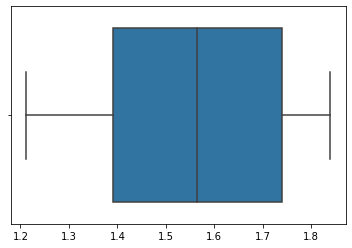

In [ ]:
sns.boxplot(reg_predict)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


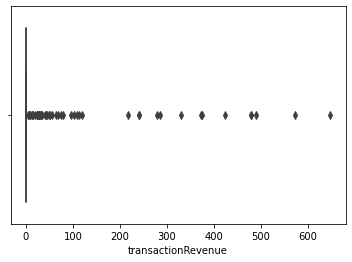

In [ ]:
sns.boxplot(y_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


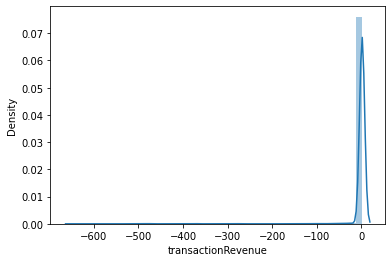

In [ ]:
sns.distplot(reg_predict - y_test)

Precisamos calcular novas variáveis, mexer nos parâmetros, calcular novos modelos para ter algo que valha a pena se basear.

#**4 - Melhorando o feature engineering**

##**Criando variáveis qualitativas**

Há variáveis qualitativas na base que podemos agregar para fazer um modelo melhor.

Podemos avaliar quais dispositivos o usuário usa e faz a compra, primeira e última visita; orgânico ou patrocinado.

In [ ]:
visitas_ultima = df.groupby('fullVisitorId', as_index=False)
visitas_ultima = visitas_ultima['visitNumber'].max()

##**Retornando valores da última visita**

In [ ]:
visitas_ultima

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


Precisamos combinar as visitas_ultimas com os dados do df. Precisamos ter chaves únicas, garantir que não tenhamos usuários repetidos.
Os DFs que foram criados usando o groupby já possuem chave única de agordo com o agrupamento.

In [ ]:
usuarios_visitantes_unicos = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])

In [ ]:
usuarios_visitantes_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [ ]:
usuarios_visitantes_unicos.shape

(12270, 31)

Criaremos um data frame que será usado na modelagem combinando 2 dfs

In [ ]:
visitas = pd.merge(visitas_ultima, usuarios_visitantes_unicos, 
                   left_on=['fullVisitorId', 'visitNumber'], 
                   right_on=['fullVisitorId', 'visitNumber'],
                   how='left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [ ]:
visitas.shape

(9997, 31)

##**Retornando valores da primeira visita**
Agora que temos um data frame com a última visita do usuário, precisamos criar um df com a primeira visita do usuário.

In [ ]:
visitas_primeira = df.groupby('fullVisitorId', as_index=False)

In [ ]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [ ]:
visitas_primeira.head() 
#como usamos amostras de bases pode ser que alguns usuários fiquem com suas primeiras visitas fora do dataset
#portanto nem sempre o min será 1

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
visitas_primeira.set_index('fullVisitorId', inplace=True)

In [ ]:
visitas_primeira.head()


,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [ ]:
visitas = visitas.join(visitas_primeira, how= 'left',on='fullVisitorId', rsuffix='primeira')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumberprimeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [ ]:
visitas = pd.merge(visitas, usuarios_visitantes_unicos, left_on=['fullVisitorId','visitNumberprimeira'],
                   right_on=['fullVisitorId','visitNumber'], how='left',
                   suffixes=['ultima','primeira'])

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,sessionIdultima,visitIdultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,pageviewsultima,bouncesultima,newVisitsultima,transactionRevenueultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,sessionIdprimeira,visitIdprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,continentprimeira,subContinentprimeira,countryprimeira,regionprimeira,metroprimeira,cityprimeira,networkDomainprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,pageviewsprimeira,bouncesprimeira,newVisitsprimeira,transactionRevenueprimeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcas

##**Limpando a base de dados**

As variáveis quantitativas já foram definidas estratégias para o modelo, então podemos exluir dessa última base

In [ ]:
len(visitas.columns)

62

In [ ]:
quant

['bounces', 'newVisits', 'pageviews', 'transactionRevenue']

In [ ]:
for coluna in quant:
  visitas.drop(coluna +'ultima', axis=1, inplace=True)
  visitas.drop(coluna +'primeira', axis=1, inplace=True)

In [ ]:
len(visitas.columns)

54

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,sessionIdultima,visitIdultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,sessionIdprimeira,visitIdprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,continentprimeira,subContinentprimeira,countryprimeira,regionprimeira,metroprimeira,cityprimeira,networkDomainprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2


Os Ids não são importantes para o modelo.
São valores interessantes para identificar valores únicos mas não no modelo de previsão.

também eliminaremos as colunas geográficas

In [ ]:
ids = ["sessionIdultima",'visitIdultima',"sessionIdprimeira",'visitIdprimeira']
# não foi excluido o full visit Id pois ainda o usaremos, mas será excluído adiante.

In [ ]:
visitas.drop(ids, axis=1, inplace=True)

In [ ]:
len(visitas.columns)

50

In [ ]:
visitas.columns

Index(['fullVisitorId', 'visitNumberultima', 'channelGroupingultima',
       'dateultima', 'visitStartTimeultima', 'browserultima',
       'operatingSystemultima', 'isMobileultima', 'deviceCategoryultima',
       'continentultima', 'subContinentultima', 'countryultima',
       'regionultima', 'metroultima', 'cityultima', 'networkDomainultima',
       'campaignultima', 'sourceultima', 'mediumultima', 'keywordultima',
       'isTrueDirectultima', 'referralPathultima', 'adContentultima',
       'campaignCodeultima', 'hitsultima', 'visitNumberprimeira',
       'channelGroupingprimeira', 'dateprimeira', 'visitNumberprimeira',
       'visitStartTimeprimeira', 'browserprimeira', 'operatingSystemprimeira',
       'isMobileprimeira', 'deviceCategoryprimeira', 'continentprimeira',
       'subContinentprimeira', 'countryprimeira', 'regionprimeira',
       'metroprimeira', 'cityprimeira', 'networkDomainprimeira',
       'campaignprimeira', 'sourceprimeira', 'mediumprimeira',
       'keywordprimeir

In [ ]:
geo=['countryprimeira', 'regionprimeira',
       'metroprimeira', 'cityprimeira',
     'continentprimeira','subContinentprimeira',
     'networkDomainprimeira']

In [ ]:
visitas.drop(geo, axis=1, inplace=True)

In [ ]:
visitas.shape

(9997, 43)

##**Criando variáveis diversas**

In [ ]:
df_quant.head()

,fullVisitorId,bounces,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1.0,1,0.0
1,0010286039787739137,0.0,1.0,3,0.0
2,0011056874471185769,0.0,1.0,2,0.0
3,0014443856125569702,1.0,1.0,1,0.0
4,0017260116665815114,0.0,0.0,2,0.0


In [ ]:
visitas = pd.merge(visitas, df_quant, left_on=['fullVisitorId'],
                   right_on=['fullVisitorId'], how='left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0.0


visitStartTime é um número que pode ajudar para ver quanto tempo o usuário acessou da primeira e última vez, se foi horas, dias meses etc...

In [ ]:
visitas['tempo_dif'] = visitas.visitStartTimeultima - visitas.visitStartTimeprimeira

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0.0,0


Quantas visitas o usuário teve.

In [ ]:
visits = df.groupby('fullVisitorId', as_index=False).count().visitNumber.values 
# foi feita uma contagem de quantas vezes apareceu VisitNumber para cada usuário

In [ ]:
visits

array([1, 1, 1, ..., 1, 1, 2])

In [ ]:
visitas["visits"] = visits

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0.0,0,1,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0.0,0,1,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0.0,0,1,2017,4,20


vamos criar variáveis de tempo para descobrirmso sazonalidade, datas comemorativas etc


In [ ]:
data ="20160904"	
data

'20160904'

In [ ]:
data[6:8]

'04'

In [ ]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.dateultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.dateultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.dateultima])

In [ ]:
visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.dateprimeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.dateprimeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.dateprimeira])

In [ ]:
visitas.head()

,fullVisitorId,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [ ]:
visitas.shape

(9997, 55)

#**5 - Treinando novos modelos**

##**Identificando os tipos de colunas**

In [ ]:
visitas.dtypes

fullVisitorId               object
visitNumberultima            int64
channelGroupingultima       object
dateultima                  object
visitStartTimeultima         int64
browserultima               object
operatingSystemultima       object
isMobileultima                bool
deviceCategoryultima        object
continentultima             object
subContinentultima          object
countryultima               object
regionultima                object
metroultima                 object
cityultima                  object
networkDomainultima         object
campaignultima              object
sourceultima                object
mediumultima                object
keywordultima               object
isTrueDirectultima          object
referralPathultima          object
adContentultima             object
campaignCodeultima          object
hitsultima                  object
visitNumberprimeira          int64
channelGroupingprimeira     object
dateprimeira                object
visitNumberprimeira 

In [ ]:
visitas.drop('fullVisitorId', inplace=True, axis=1)

visitas.head()

,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [ ]:
y = visitas.transactionRevenue.copy()

In [ ]:
x = visitas.drop('transactionRevenue', axis=1)
x.head()

,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1.0,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,0.0,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,0.0,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1.0,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,0.0,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
quali = visitas.dtypes[visitas.dtypes == object].keys()
quali # todas as variáveis qualitativas

Index(['channelGroupingultima', 'dateultima', 'browserultima',
       'operatingSystemultima', 'deviceCategoryultima', 'continentultima',
       'subContinentultima', 'countryultima', 'regionultima', 'metroultima',
       'cityultima', 'networkDomainultima', 'campaignultima', 'sourceultima',
       'mediumultima', 'keywordultima', 'isTrueDirectultima',
       'referralPathultima', 'adContentultima', 'campaignCodeultima',
       'hitsultima', 'channelGroupingprimeira', 'dateprimeira',
       'browserprimeira', 'operatingSystemprimeira', 'deviceCategoryprimeira',
       'campaignprimeira', 'sourceprimeira', 'mediumprimeira',
       'keywordprimeira', 'isTrueDirectprimeira', 'referralPathprimeira',
       'adContentprimeira', 'campaignCodeprimeira', 'hitsprimeira'],
      dtype='object')

##**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#label encoder substitui variáveis qualitativas por um número

Temos que garantir que todos os valores são textos

In [ ]:
strings = list(x.operatingSystemultima.values.astype('str')) #garanto que todos os valores são textos

In [ ]:
lbl = LabelEncoder()

In [ ]:
lbl.fit(strings) # fit aprende com os dados

LabelEncoder()

In [ ]:
lbl.transform(strings) #onde quero aplicar e transforma os dados

array([ 9,  3,  9, ..., 11,  1,  9])

**Fazendo para todas as variáveis**

In [ ]:
for coluna in quali:
  lbl = LabelEncoder()
  strings=list(x[coluna].values.astype('str'))
  lbl.fit(strings)
  x[coluna] = lbl.transform(strings)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x.head()

,visitNumberultima,channelGroupingultima,dateultima,visitStartTimeultima,browserultima,operatingSystemultima,isMobileultima,deviceCategoryultima,continentultima,subContinentultima,countryultima,regionultima,metroultima,cityultima,networkDomainultima,campaignultima,sourceultima,mediumultima,keywordultima,isTrueDirectultima,referralPathultima,adContentultima,campaignCodeultima,hitsultima,visitNumberprimeira,channelGroupingprimeira,dateprimeira,visitNumberprimeira,visitStartTimeprimeira,browserprimeira,operatingSystemprimeira,isMobileprimeira,deviceCategoryprimeira,campaignprimeira,sourceprimeira,mediumprimeira,keywordprimeira,isTrueDirectprimeira,referralPathprimeira,adContentprimeira,campaignCodeprimeira,hitsprimeira,bounces,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,0,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,0,1.0,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,39,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,39,0.0,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,16,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,17,0.0,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,0,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,0,1.0,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,16,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,17,0.0,0.0,2,0,1,2017,4,20,2017,4,20


##**Treinando uma regressão linear**


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_predict = reg.predict(x_test)

Notamos valores negativos, vamos converter esses valores para zero, por isso criamos a regra no reg predict

In [ ]:
reg_predict[reg_predict < 0] = 0

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro']= reg_predict - y_test

resultados.head()

,revenue,predict,erro
4122,0.0,0.196245,0.196245
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.000000,0.000000


In [ ]:
print(f'A média do revenue é {resultados.revenue.mean()} com desvio padrão de {resultados.revenue.std()}')
print(f'A média da previsão é {resultados.predict.mean()} com desvio padrão de {resultados.predict.std()}')

A média do revenue é 2.302663333333333 com desvio padrão de 28.40031066300714
A média da previsão é 2.6029579329901416 com desvio padrão de 9.649205784327197


In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.405661,-18.084339
5928,74.85,36.827039,-38.022961
8361,424.50,17.896655,-406.603345
8612,55.99,16.905466,-39.084534
416,15.19,22.319092,7.129092
4077,5.97,14.845100,8.875100
8146,27.19,13.184905,-14.005095
4908,372.65,131.932983,-240.717017
9395,29.98,20.174207,-9.805793
8728,101.95,87.109516,-14.840484


In [ ]:
np.sqrt(mean_squared_error(y_test, reg_predict)) 

25.026336442902135

In [ ]:
# para comparação
df_quant.transactionRevenue.std()

25.131162674666623

**valor de desvio padrão bem próximo**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


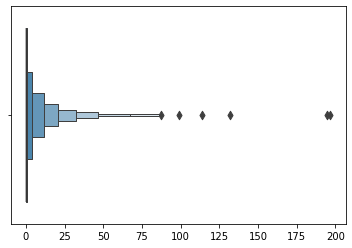

In [ ]:
sns.boxenplot(reg_predict) # 
#representa bem mais do que o modelo anterior pois os valores variam até 200 
#enquanto no anterios ficava numa pequena faixa entre 1 e 2

##**Treinando um Gradient Boosting**

Em vez de fazer apenas um preditor para a base inteira ele criará pequenos vários pequenos.
Cria um modelo e aprende com ele, esse aprendizado e passado para os seguintes modelos.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(random_state=42)

In [ ]:
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_predict = gb.predict(x_test)

In [ ]:
gb_predict

array([ 0.14399303, -0.01154569, -0.03554255, ...,  0.22898756,
        0.20131164, -0.03832608])

In [ ]:
gb_predict[gb_predict < 0] = 0

gb_predict

array([0.14399303, 0.        , 0.        , ..., 0.22898756, 0.20131164,
       0.        ])

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro']= gb_predict - y_test

resultados.head()

,revenue,predict,erro
4122,0.0,0.143993,0.143993
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.852498,0.852498


In [ ]:
print(f'A média do revenue é {resultados.revenue.mean()} com desvio padrão de {resultados.revenue.std()}')
print(f'A média da previsão é {resultados.predict.mean()} com desvio padrão de {resultados.predict.std()}')

A média do revenue é 2.302663333333333 com desvio padrão de 28.40031066300714
A média da previsão é 2.1829274936664125 com desvio padrão de 15.393558035576719


In [ ]:
np.sqrt(mean_squared_error(y_test, gb_predict)) 


23.51548651640668

In [ ]:
# para comparação
df_quant.transactionRevenue.std()

25.131162674666623

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


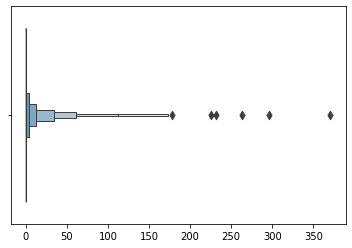

In [ ]:
sns.boxenplot(gb_predict)